<a href="https://colab.research.google.com/github/avadhutc/Session4/blob/master/code/Eva_Session_4_Fourth_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## This Pytorch notebook implementation similar to Keras fourth notebook
### This notebook uses:
#### 1. batch size 128
#### 2. Epochs =50
#### 3. Reduce Lr on Plateau
#### 4. BatchNormalization
#### 5. Dropout(0.2)

In [0]:
# import torch and torchvision package for use
import torch
import torchvision
import torchvision.transforms as transforms

In [118]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cuda:0


In [0]:
 
batch_size = 128
batch_size_train = 128
batch_size_test = 128
learning_rate = 0.01
## global mean and std (0.1307,), (0.3081,)
# normalize training and test dataset between 0 and 1
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.1307,), (0.3081,))])
trainset = torchvision.datasets.MNIST(root='./data', train= True,
                                      download= True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size = batch_size, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train= False,
                                      download= True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size = batch_size, shuffle=False)

image_datasets = {
    'train': trainset,    
    'validation': testset    
}

dataloaders = {
    'train': torch.utils.data.DataLoader(image_datasets['train'], batch_size = batch_size, shuffle=True),    
    'validation': torch.utils.data.DataLoader(image_datasets['validation'], batch_size = batch_size, shuffle=False)
}

classes = ('0', '1', '2', '3',
          '4', '5', '6', '7', '8', '9')

In [0]:
examples = enumerate(testloader)
batch_idx, (example_data, example_targets) = next(examples)

In [109]:
example_data.shape

torch.Size([128, 1, 28, 28])

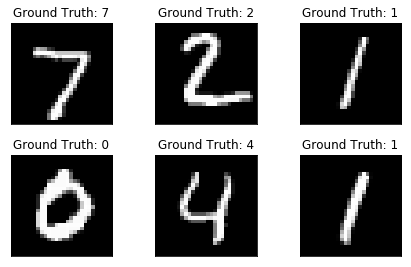

In [110]:
import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])
  fig

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


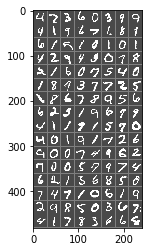

    4     7     3     6     0     3     9     9     4     1     9     6     7     1     8     1     6     1     5     1     0     1     0     1     4     2     9     4     3     0     7     8


In [111]:
import matplotlib.pyplot as plt# import pyplot alias plt for plotting
import numpy as np # import numpy package alias np

# functions ti show an image

def imshow(img): 
  img = img/2 + 0.5 # unnormalize
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1, 2, 0)))
  plt.show() # display image
  
  
#get some random training images
dataiter = iter(trainloader)
images,labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(32)))

In [0]:
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary

In [122]:
class Net(nn.Module):
        def __init__(self):
          super(Net, self).__init__()        
          self.conv1 = nn.Sequential(nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=0), nn.ReLU()) # Input Channel dimension= 1, output channel dimension= 32, RF = 3        
          self.bnrm1 = nn.Sequential(nn.BatchNorm2d(16))
          self.drop1 = nn.Sequential(nn.Dropout2d(0.2))
          self.conv2 = nn.Sequential(nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=0), nn.ReLU())# Input Channel dimension= 16, output channel dimension= 32, RF = 5
          self.bnrm2 = nn.Sequential(nn.BatchNorm2d(32))
          self.drop2 = nn.Sequential(nn.Dropout2d(0.2))
          self.pool1 = nn.Sequential(nn.MaxPool2d(kernel_size=2, stride=2))# Input Channel dimension= 32, output channel dimension= 32, RF = 6
          self.conv3 = nn.Sequential(nn.Conv2d(32, 10, kernel_size=1, stride=1, padding=0), nn.ReLU())  # Input Channel dimension= 32, output channel dimension= 10, RF = 6       
          self.conv4 = nn.Sequential(nn.Conv2d(10, 64, kernel_size=3, stride=1, padding=0), nn.ReLU())# Input Channel dimension= 10, output channel dimension= 64, RF = 10
          self.bnrm3 = nn.Sequential(nn.BatchNorm2d(64))
          self.drop3 = nn.Sequential(nn.Dropout2d(0.2))
          self.pool2 = nn.Sequential(nn.MaxPool2d(kernel_size=2, stride=2))# Input Channel dimension= 64, output channel dimension= 64, RF = 11
          self.conv5 = nn.Sequential(nn.Conv2d(64, 10, kernel_size=1, stride=1, padding=0)) # Input Channel dimension= 64, output channel dimension= 10, RF = 11   
          self.conv6 = nn.Sequential(nn.Conv2d(10, 10, kernel_size=5, stride=1, padding=0)) # Input Channel dimension= 10, output channel dimension= 10, RF = 11 + 8 + 8 = 27               
          
          
        def forward(self, x):
          x = self.conv1(x)
          x = self.bnrm1(x)
          x = self.drop1(x)
          x = self.conv2(x)
          x = self.bnrm2(x)
          x = self.drop2(x)
          x = self.pool1(x)
          x = self.conv3(x)
          x = self.conv4(x)
          x = self.bnrm3(x)
          x = self.drop3(x)
          x = self.pool2(x)
          x = self.conv5(x)
          x = self.conv6(x)
          
          x = x.reshape(x.size(0), -1) #flatten image dimension into 1
          
          #print(x.size(0))
          #x = x.view(x.size(0), -1)# or x = x.view(32, -1) as batch_size=32 or x.view(x.size(0), -1)
          
          x = F.log_softmax(x)# softmax to assign confidence score of each class
          return x
        
model = Net().to(device)
summary(model, (1, 28, 28))    


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 26, 26]             160
              ReLU-2           [-1, 16, 26, 26]               0
       BatchNorm2d-3           [-1, 16, 26, 26]              32
         Dropout2d-4           [-1, 16, 26, 26]               0
            Conv2d-5           [-1, 32, 24, 24]           4,640
              ReLU-6           [-1, 32, 24, 24]               0
       BatchNorm2d-7           [-1, 32, 24, 24]              64
         Dropout2d-8           [-1, 32, 24, 24]               0
         MaxPool2d-9           [-1, 32, 12, 12]               0
           Conv2d-10           [-1, 10, 12, 12]             330
             ReLU-11           [-1, 10, 12, 12]               0
           Conv2d-12           [-1, 64, 10, 10]           5,824
             ReLU-13           [-1, 64, 10, 10]               0
      BatchNorm2d-14           [-1, 64,

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


In [0]:
log_interval = 200
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau
import time
import copy

criterion = nn.CrossEntropyLoss()   ## cross entropy loss
optimizer = optim.Adam(model.parameters(), lr=0.003,betas=(0.9, 0.999), eps=1e-8,weight_decay=0, amsgrad=False )##adam optimizer, learning rate = 1e-3

scheduler = optim.lr_scheduler.ReduceLROnPlateau(
    optimizer,mode='max', patience=7, factor=0.1,  verbose=True)

In [0]:
##loop over 50 epochs, one batch has 32 samples, avg loss and accuracy printed over 3200 samples
log_interval = 200
def train_model(model, criterion, optimizer, num_epochs=3):
      for epoch in range(0, num_epochs):  #loop over the dataset multiple times
              print('Epoch {}/{}'.format(epoch+1, num_epochs))
              print('-' * 10)
        
              for phase in ['train', 'validation']:
                  if phase == 'train':
                      model.train()
                  else:
                      model.eval()

                  running_loss = 0.0
                  running_corrects = 0
                  correct = 0
                  total = 0
                  
                  for batch_idx, data in enumerate(dataloaders[phase], 0):
                      #get the inputs
                      inputs, labels = data

                      inputs, labels = inputs.to(device), labels.to(device)
                      
                      # Clear gradients w.r.t. parameters
                      #optimizer.zero_grad()
                      
                      #forward + backward _ optimize
                      outputs = model(inputs)
                      loss = criterion(outputs, labels)
                      
                      if phase == 'train':
                          #zero the parameter gradients
                          optimizer.zero_grad()
                          # Backpropagation
                          loss.backward()
                          optimizer.step()

                      _, preds = torch.max(outputs, 1)
                      running_loss += loss.detach() * inputs.size(0)
                      running_corrects += torch.sum(preds == labels.data)
                  
                  epoch_loss = running_loss / len(image_datasets[phase])
                  epoch_acc = running_corrects.float() / len(image_datasets[phase])

                  print('{} loss: {:.4f}, acc: {:.4f}'.format(phase,
                                                        epoch_loss.item(),
       
                                                              epoch_acc.item()))
                  print('-'*20)
                  scheduler.step(epoch_acc)
      return model          

In [125]:
model_trained = train_model(model, criterion, optimizer, num_epochs=50)

Epoch 1/50
----------


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


train loss: 0.1783, acc: 0.9480
--------------------
validation loss: 0.0548, acc: 0.9814
--------------------
Epoch 2/50
----------
train loss: 0.0711, acc: 0.9787
--------------------
validation loss: 0.0370, acc: 0.9872
--------------------
Epoch 3/50
----------
train loss: 0.0590, acc: 0.9823
--------------------
validation loss: 0.0359, acc: 0.9886
--------------------
Epoch 4/50
----------
train loss: 0.0525, acc: 0.9835
--------------------
validation loss: 0.0393, acc: 0.9878
--------------------
Epoch 5/50
----------
train loss: 0.0460, acc: 0.9861
--------------------
validation loss: 0.0332, acc: 0.9893
--------------------
Epoch 6/50
----------
train loss: 0.0420, acc: 0.9873
--------------------
validation loss: 0.0296, acc: 0.9894
--------------------
Epoch 7/50
----------
train loss: 0.0384, acc: 0.9879
--------------------
validation loss: 0.0313, acc: 0.9909
--------------------
Epoch 8/50
----------
train loss: 0.0373, acc: 0.9887
--------------------
validation loss:

In [126]:
#model score accuarcy on test data
correct = 0
total = 0
with torch.no_grad():
  for data in testloader:
    images, labels = data
    images = images.to(device)
    labels = labels.to(device)
    outputs = model(images)
    
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
    
print('Accuracy of the network on the 10000 test images: %.6f %%' % (100 * correct / total))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Accuracy of the network on the 10000 test images: 99.350000 %


## Maximum Validation Accuracy achieved 99.40% @ 24th epoch with 14.3K parameters